# Apple Stock Price Time Series Analysis and Forecasting

> if data follow the 5 key characteristic. then data is ready for time series analysis.
  * (chronological order, sequential order, temponal component, constant frequency, dynamic nature)
> goal of time series: understanding past, forcast future. 

> time series analysis
 . understanding past
 . predict future
> best approach to understand the data not to apply all algo and check.

### Why Domain Knowledge and Understanding Time Series Techniques Are Important:

1. Without domain knowledge, outliers may be wrongly removed, missing values incorrectly imputed, or trends misinterpreted, leading to poor forecasting and decision-making. Combining both domain expertise and time series techniques results in more reliable and business-relevant insights.

2. Mistake: Using a basic forecasting model in Energy consumption without considering external factors like temperature, industrial demand, or government regulations.
Impact: The model may predict stable energy consumption, missing fluctuations caused by extreme weather or policy changes.

3. Mistake: Applying ARIMA to predict stock prices without considering major events (earnings reports, interest rate hikes).
Impact: The model may assume a steady trend, failing to capture unexpected market crashes or rallies.

4. Without domain knowledge, an analyst might waste time applying and tuning models that are unsuitable for the data.
a poorly chosen model might yield accurate predictions but fail to explain underlying factors. 

### Challenges of Blind Model Testing

1. Wasted Resources:

Trying all models requires significant time for training, tuning, and evaluation, especially for computationally expensive techniques like neural networks.
2. Overfitting Risks:

Blindly testing many models increases the likelihood of overfitting, where a model performs well on historical data but poorly on new data.
3. Missed Insights:

A brute-force approach focuses on metrics like RMSE or MAE without understanding underlying trends, interactions, or seasonality in the data.
4. Loss of Interpretability:

Models chosen without domain knowledge may perform well but fail to provide actionable insights, limiting their utility for decision-making.

## Load Data

In [4]:
# pip install finance

In [2]:
import yfinance as yf # we use yahoo api/library
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
stock_data = yf.download('AAPL', start= '2024-01-01', end= '2024-12-01', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.shape

(231, 6)

In [5]:
stock_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.532074,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.150375,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,180.824356,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.098694,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.452560,185.559998,185.600006,181.500000,182.089996,59144500
2024-01-09,184.035065,185.139999,185.149994,182.729996,183.919998,42841800
2024-01-10,185.078812,186.190002,186.399994,183.919998,184.350006,46792900
2024-01-11,184.482391,185.589996,187.050003,183.619995,186.539993,49128400


## DATA CLEANING

In [6]:
stock_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [7]:
stock_data.index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2024-11-15', '2024-11-18', '2024-11-19', '2024-11-20',
               '2024-11-21', '2024-11-22', '2024-11-25', '2024-11-26',
               '2024-11-27', '2024-11-29'],
              dtype='datetime64[ns]', name='Date', length=231, freq=None)

> When handling missing values in time series data, simply dropping or filling them with mean, median, or mode can negatively impact the modeling and forecasting process. 
. Time series data is sequential, meaning every data point depends on previous ones. Dropping values can create gaps and break patterns.
. Filling with Mean
The mean assumes a constant average, ignoring trends in time series data.
. Effect on Modeling:
Removes the natural fluctuations, making the series less dynamic.
Bad for models that rely on past values (ARIMA, LSTM), as it disrupts autocorrelations.
Median is robust to outliers but still ignores trends and seasonality.
Mode works best for categorical data, but financial or continuous time series data does not have repeating values.
. use trend-aware methods like interpolation, forward fill, or rolling averages for better forecasting accuracy.

In [8]:
stock_data.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

## outlier detection

. Financial time series can have extreme fluctuations, and without domain knowledge, it’s difficult to decide if a spike is an error or an actual event.
. A sudden jump/drop might be due to real events (e.g., earnings reports, mergers, or crises)
. Problem: If we mistakenly remove real spikes, we lose important financial trends.
. Sometimes, stock prices momentarily drop due to errors in trading algorithms (e.g., the 2010 Flash Crash).
. Sometimes, the API may return incorrect or zero values for stock prices.

<Axes: xlabel='Ticker'>

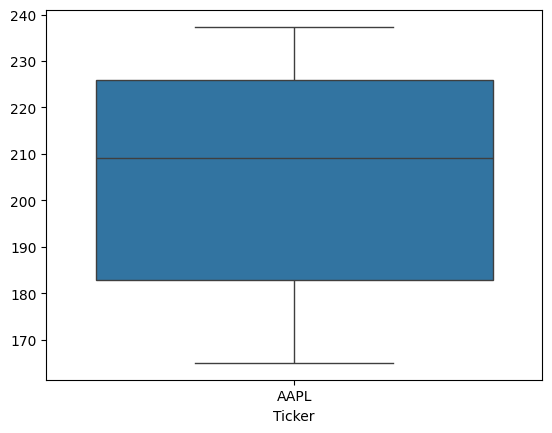

In [9]:
# using boxplot
import seaborn as sns  
sns.boxplot(data=stock_data['Close'])

<Axes: xlabel='Ticker'>

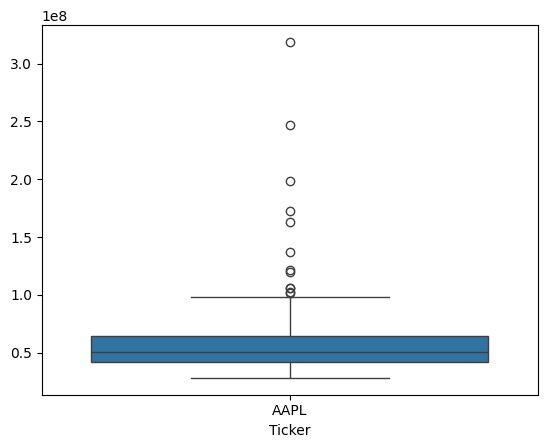

In [10]:
# using boxplot
import seaborn as sns  
sns.boxplot(data=stock_data['Volume'])

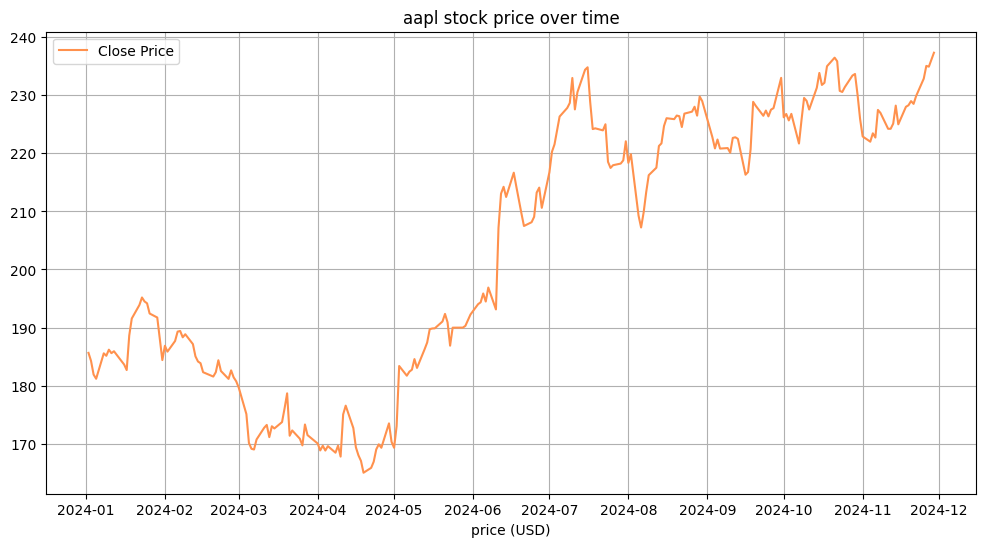

In [11]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label= 'Close Price', color= '#FF914D')
plt.title('aapl stock price over time')
plt.xlabel('date')
plt.xlabel('price (USD)')
plt.legend()
plt.grid(True)
plt.show()

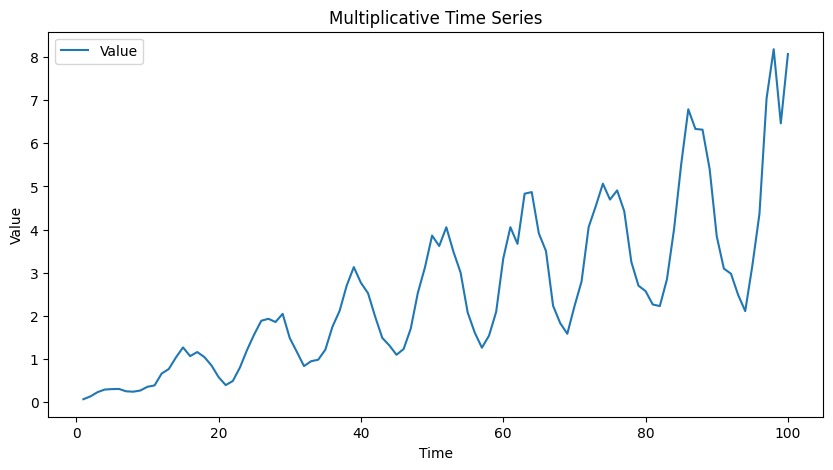

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time = np.arange(1, 101)  # 100 time points
trend = 0.05 * time  # Increasing trend
seasonality = 1 + 0.5 * np.sin(2 * np.pi * time / 12)  # Multiplicative seasonality
random_noise = np.random.normal(1, 0.1, size=len(time))  # Small noise

data = trend * seasonality * random_noise  # Multiplicative nature

df = pd.DataFrame({'Time': time, 'Value': data})

# Plot the time series
df.plot(x='Time', y='Value', figsize=(10, 5), title='Multiplicative Time Series')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()


### Time Series Decomposition and its types

> time series decomposition components: trends, seasonality, noise.
> types of decomposition: 1. additve and 2. multiplative decomposition and 3. stl decomposition.
  . first to understand the nature of our data that best for additive or multiplicative.
> Additive: 
  . if we decompose data and then after get the original data when apply addition then we need apply additive decomposition.
  . similarly for multiplavative.

In [13]:
# pip install statsmodels


In [14]:
# classic time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


In [15]:
decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [16]:
# Extracting Decomposed Components
trend_additive = decomposition_additive.trend 
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

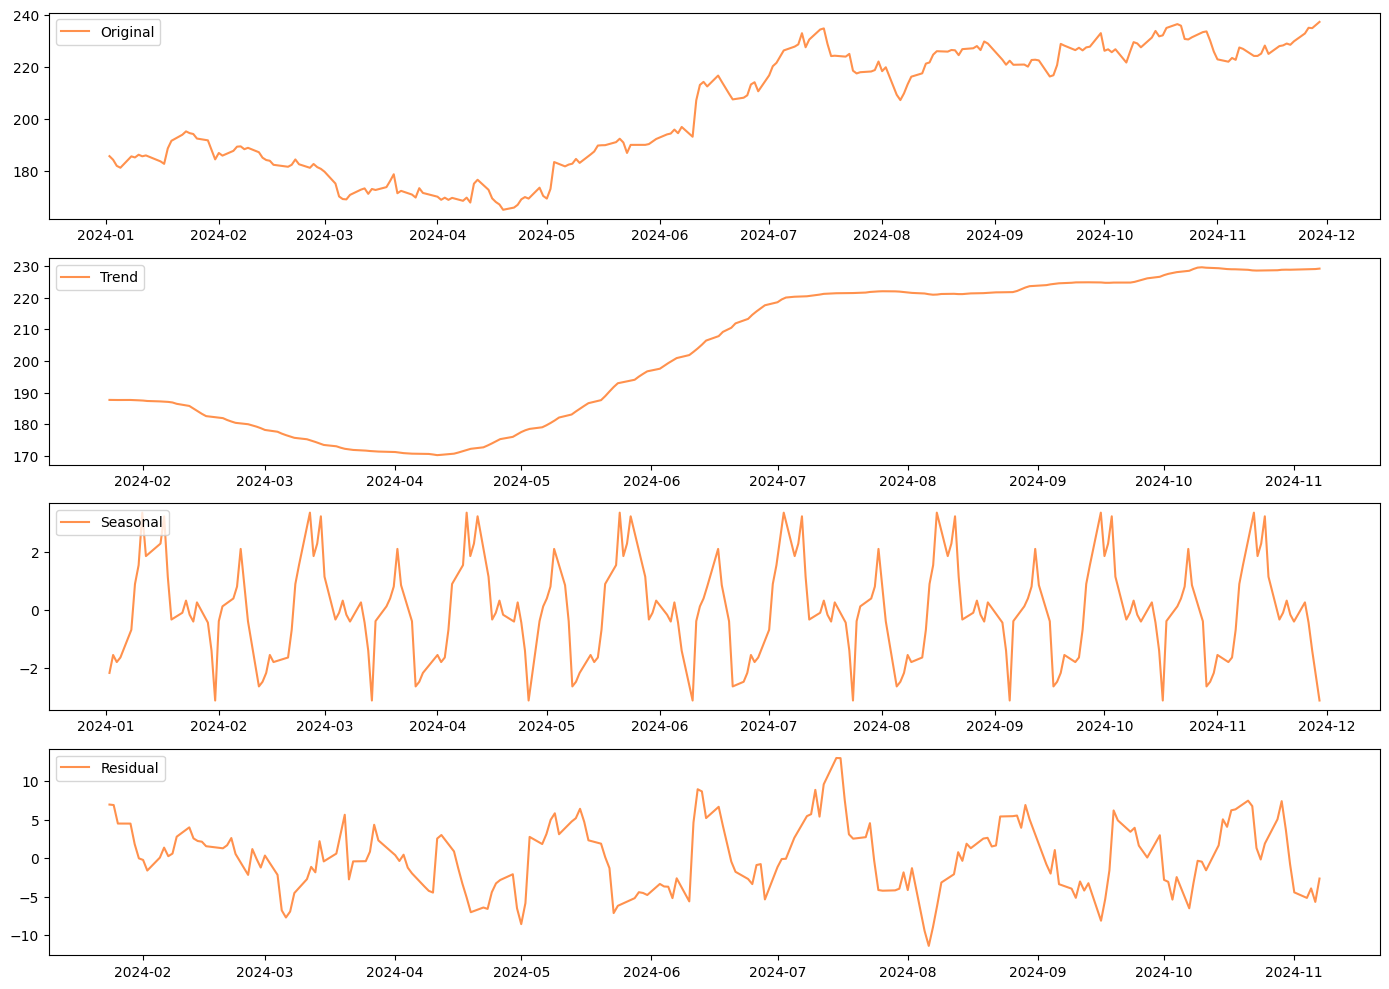

In [17]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label= 'Original', color = '#FF914D')
plt.legend(loc= 'upper left')
plt.subplot(412)
plt.plot(trend_additive, label= 'Trend', color = '#FF914D')
plt.legend(loc= 'upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label= 'Seasonal', color = '#FF914D')
plt.legend(loc= 'upper left')
plt.subplot(414)
plt.plot(residual_additive, label= 'Residual', color = '#FF914D')
plt.legend(loc= 'upper left')
plt.tight_layout()
plt.show()

> STL decomposition is a powerful tool for analyzing and understanding time series data, especially when dealing with complex seasonal patterns or trends. By separating the trend, seasonality, and residuals, it enables more accurate forecasting, anomaly detection, and deeper insights into time-dependent data. 
. If the data is noisy and non-linear and have outlier → STL.
> Key Features of STL:
Seasonality Flexibility: Can handle any seasonal pattern, not necessarily fixed or periodic.
Robustness: The method is robust to outliers in the data.
Adjustable Parameters: You can adjust the degree of smoothing for both trend and seasonal components.
Works Well with Complex Data: Can deal with changing seasonality or irregular trends that simple decomposition methods might miss.

>
1. Classical Decomposition is suitable for simple, stationary time series with linear trends and constant seasonality. 
2. STL Decomposition using LOESS(locally estimated scatterplot smoothing) is ideal for more complex time series data, especially when the trend is non-linear and seasonality is dynamic or changing over time. It is more flexible, robust, and can handle irregularities in the data. only handle additive model. it robust for outlier. only handle additive decomposition.
  . Classical Decomposition handle both additive and multiplacative. not robust to outlier
  . STL only handle additive model.in stl seasonal pattern change over time. amd show actual seasonal pattern.
  . in classical have fixed seasonal pattern and show only fix seansonal pattern from data. handle both additive and multiplacative.
  . if data support the additive then apply STL and if data support the multiplicative then apply the classic.
  . STL is useful for analyzing financial time series because it can adapt to changing patterns over time.
  

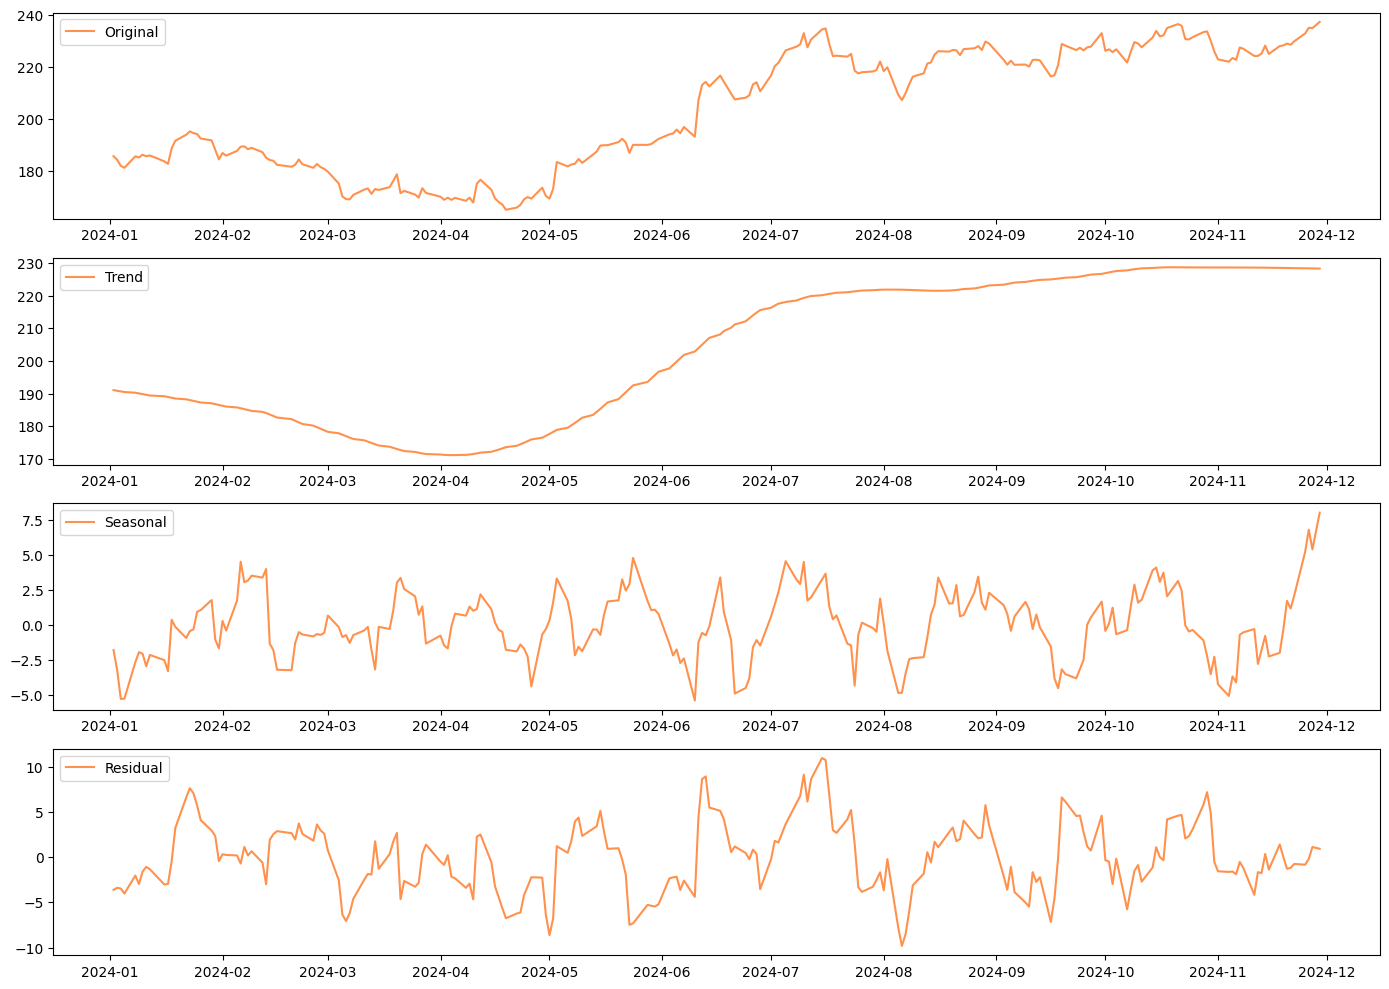

In [18]:
# STL
from statsmodels.tsa.seasonal import STL
# perform STL decomposition
stl = STL(stock_data['Close'], period= 30)
result = stl.fit()

# plot the decomposition components
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed, label = 'Original', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(result.trend, label = 'Trend', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(result.seasonal, label = 'Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label = 'Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.tight_layout() #  Adjusts spacing between subplots
plt.show()

## Stationarity

### Why Do We Need Stationarity in Time Series Data?
We need to make data stationary in time series analysis because most statistical and machine learning models (like ARIMA) assume that the data’s mean, variance, and autocovariance remain constant over time. Stationary data ensures that the relationships between past and future values are stable, making forecasting more reliable and accurate. If the data is non-stationary (e.g., has trends or seasonality), models may fail to detect meaningful patterns, leading to poor predictions. 
> Techniques like:
   . differencing, transformation, and detrending help in converting non-stationary data into a stationary form. 

> types of stationarity:
* weak stationarity: (mean, variance, autocorrelation) is constant. and join distribution can be change.
* strict stationarity: include all properties of waek stationarity plus join distribution remain unchanged when shifted along any timeperiod.


> tests of strict stationary. property of week stationary is also present strict stationary data.
1. KS test: compare the cumulative distribution functions of two samples. and check that it is same.
         p > 0.05  no difference in distribution. that mean data a completely stationary data.

> to check our data is stationary or not we have 3 tests. ADF, KPSS, KS tests.
> to check weak stationarity: we use ADF, and KPSS test.
> to check strict stationary: we have ks test.
> ks test: compare the cumulative distribution functions of two samples.
  . If the CDFs are very different, the datasets likely come from different distributions.
  . If the CDFs closely match, they may be from the same distribution.
   if p > 0.05 then no differrence in distribution. mean that data is strict stationarity data.

> when (mean, variance, auto correlation) is constant overtime then over data is stationary.
> constant MEAN mean that have no trend. variance is same on every variation.
>auto correlation: when one section is same to another section then we say that same correlation.
> we use different techniques to make data stationary.


## ADF TEST

ADF TEST: check for non stationary trends (presence of unit roots).
1. null hypothesis (h0): data has unique root(non stationary)
2. unique hyppothesis (h1): stationary
. decision criteria: p < 0.05  then stationary   => p value that we check againt the signifinance value.
                     ADF stat < critical value    then reject the null hypothesis. mean that our data is stationary.

In [19]:
# stationary test
from statsmodels.tsa.stattools import adfuller

# perform the augment 
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print('critical values:')
for key, value in adf_test[4].items():
    print(f'     {key}: {round(value,3)}')

ADF Test Results:
ADF Statistic: -0.541
p-value: 0.884
critical values:
     1%: -3.459
     5%: -2.874
     10%: -2.574


In [20]:
-0.541 < -2.874  

False

In [21]:
0.884 < 0.05

False

In [22]:
# we see that p value(0.884) is greater than 0.05 then our data is non stationary.

## KPSS TEST

> KPSS test: fit a constant mean model on the data and measure the variance sum of cumilative residual
1. h0: stationary
2. h1: non stationary
. decision criteria: p < 0.05  then non stationary  => p value that we check againt the signifinance value.
                     KPSS stat > critical value    then non hypothesis.

In [23]:
from statsmodels.tsa.stattools import kpss

# perform the kpss test
kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend

print('KPSS Test Results:')
print(f'KPSS statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('critical values:')
for key, value in kpss_test[3].items():
    print(f'     {key}: {value}')

KPSS Test Results:
KPSS statistic: 0.25
p-value: 0.01
critical values:
     10%: 0.119
     5%: 0.146
     2.5%: 0.176
     1%: 0.216


C:\Users\Mc\AppData\Local\Temp\ipykernel_8784\920609005.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend


In [24]:
0.25 > 0.05 # then our data in non stationary

True

In [25]:
0.01 < 0.05  # => non statonarity
# after apply two test that our data is non stationary

True

## KS TEST

> tests of strict stationary. property of week stationary is also present strict stationary data.
1. KS test: compare the cumulative distribution functions of two samples. and check that it is same.
         p > 0.05  no difference in distribution. that mean data a completely stationary data.

### random data with the help of random variable to understand weak and strict stationary data.

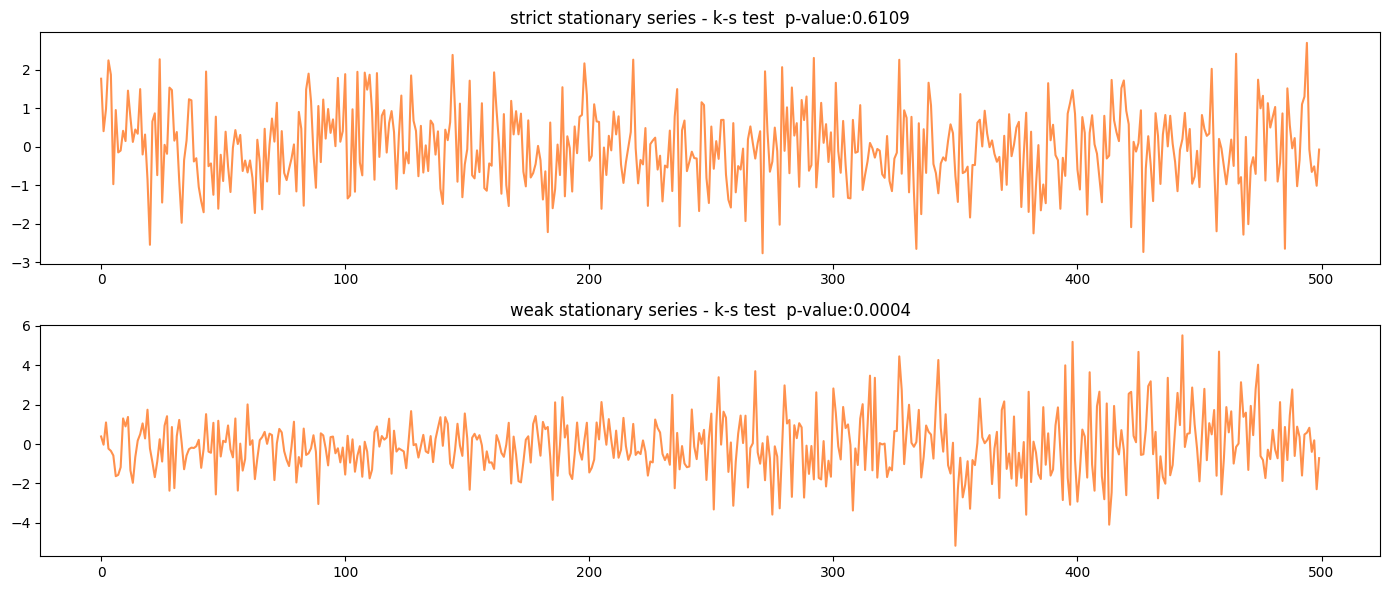

strict stationary series -k-s test statistics: 0.068, p-value: 0.6109
weak stationary series - k-s test statistic: 0.184, p-value: 0.0004


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# generating synthetic data for demonstration
np.random.seed(0)
n = 500

# strictly stationary series: normally distributed random noise
# SD = 1 =>  on average, data points are 1 unit away from the mean (0).
strict_stationary_series = np.random.normal(0,1,n)

# non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2)
])

# function to split the series into two halves and perform the k-s test to compare the distributions of the two halves.
def ks_test_stationarity(series):
    split = len(series)//2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value= ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# perform the k-s test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# perform the k-s test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2,1,1)
plt.plot(strict_stationary_series, color = '#FF914D')
plt.title(f'strict stationary series - k-s test  p-value:{ks_pvalue_strict:.4f}')

plt.subplot(2,1,2)
plt.plot(non_strict_stationary_series, color = '#FF914D')
plt.title(f'weak stationary series - k-s test  p-value:{ks_pvalue_non_strict:.4f}')

plt.tight_layout()
plt.show()

print(f'strict stationary series -k-s test statistics: {ks_stat_strict}, p-value: {ks_pvalue_strict:.4f}')
print(f'weak stationary series - k-s test statistic: {ks_stat_non_strict}, p-value: {ks_pvalue_non_strict:.4f}')

## Making data stationary 

. A time series is stationary when its statistical properties (mean, variance, and covariance(how two variables change together over time)) remain constant over time.
• Making a time series, Stationary: 
  . Differencing: First order, Second order
  . Transformation: Logarithmic, power, Box-Cox
  . De-trending: Linear, Moving Average
  . Seasonal Adjustment
> Differencing:
 . Differencing is a method to remove trends and seasonality by calculating the difference between consecutive data points or data points separated by a lag.
 . First-order differencing is sufficient for most series.
 . If the series still shows non-stationarity after first-order differencing, apply second-order differencing.
> Transformations:
 . Transformations help make a time series stationary by reducing changes in variance (how spread out the data is). If the data has increasing or decreasing fluctuations over time, applying transformations like log, square root, or power transformations can make the variations more stable.
 . If a stock price grows exponentially, taking the log of prices makes the trend more linear.
 . If fluctuations get bigger over time, applying a square root reduces their impact.


In [27]:
# performing ADF and KPSS tests
# make the function and just pass the series and check our data is stationary or not.
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items(): # result[4] contains a dictionary of critical values at different significance levels (1%, 5%, 10%)
        print('critical value (%s): %.3f' % (key, value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('kpss Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('critical value (%s): %.3f' % (key, value))        

In [28]:
prices =  stock_data['Close']

In [29]:
adf_test(prices)

ADF Statistic: -0.5409396886911988
p-value: 0.8837767870343685
critical value (1%): -3.459
critical value (5%): -2.874
critical value (10%): -2.574


In [30]:
0.88377<0.05  # our data is non stationary 

False

. Start with differencing if trends are present.
. Use transformations to stabilize variance.
. Apply de-trending for linear or non-linear trends.
. Adjust for seasonality if periodic patterns exist.

## Differencing

In [31]:
prices

Ticker,AAPL
Date,
2024-01-02,185.639999
2024-01-03,184.250000
2024-01-04,181.910004
2024-01-05,181.179993
2024-01-08,185.559998
...,...
2024-11-22,229.869995
2024-11-25,232.869995
2024-11-26,235.059998


In [32]:
prices.diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,-1.389999
2024-01-04,-2.339996
2024-01-05,-0.730011
2024-01-08,4.380005
...,...
2024-11-22,1.349991
2024-11-25,3.000000
2024-11-26,2.190002


In [33]:
# prices.diff().diff()

In [34]:
prices_diff = prices.diff()

In [35]:
prices.shape

(231, 1)

## Transformtion

In [36]:
import numpy as np
from scipy import stats

# Ensure prices is a 1-dimensional array
# Converts prices into a 1D array if it is multidimensional.
prices = np.ravel(prices)  # Flattens the array if it's multidimensional 

# log transformation
prices_log = np.log(prices) # Applies the logarithm function to reduce the scale of large values.

# square root transformation
prices_sqrt = np.sqrt(prices) # Uses powers or roots of the data to stabilize variance.

# box=cox transformation
# note: box-cox requires all positive values
# lam => optimal transformation parameter. 
prices_boxcox, lam = stats.boxcox(prices[prices>0]) # A flexible family of power transformations.

In [37]:
prices_sqrt

array([13.62497704, 13.57387196, 13.48740166, 13.46031176, 13.62204087,
       13.60661602, 13.64514575, 13.62314194, 13.63524837, 13.5510149 ,
       13.51591627, 13.7342639 , 13.84052013, 13.92443893, 13.97068333,
       13.94632568, 13.93448952, 13.87155356, 13.84666009, 13.71276753,
       13.57939593, 13.66967449, 13.63268154, 13.69963476, 13.75863376,
       13.7626307 , 13.72297371, 13.74227078, 13.68027755, 13.60294061,
       13.57018769, 13.55949854, 13.50222195, 13.47442012, 13.50259261,
       13.57829132, 13.50999646, 13.45956922, 13.51406693, 13.46922411,
       13.44432966, 13.40373096, 13.23253589, 13.0430056 , 13.00461438,
       13.        , 13.06636888, 13.14343943, 13.16168666, 13.08166675,
       13.15294644, 13.13849288, 13.18028836, 13.269514  , 13.36674972,
       13.0908363 , 13.12554756, 13.07096041, 13.02727933, 13.1647255 ,
       13.09503706, 13.03955516, 12.99384456, 13.02497577, 12.99307536,
       13.02228866, 12.9788288 , 13.02574367, 12.95299189, 13.23

In [38]:
# pass the log transformation and check to remove the non stationarity
adf_test(prices_log)

ADF Statistic: -0.5700505456888525
p-value: 0.8776067982352017
critical value (1%): -3.459
critical value (5%): -2.874
critical value (10%): -2.574


In [39]:
0.8776067982352017 < 0.05  # Non stationary

False

In [40]:
adf_test(prices_diff.dropna())

ADF Statistic: -14.303374665117165
p-value: 1.2183435725434107e-26
critical value (1%): -3.459
critical value (5%): -2.874
critical value (10%): -2.574


In [41]:
1.822500265582855e-27<0.05      # with the help of differencing we make data stationary.

True

In [42]:
prices_sqrt

array([13.62497704, 13.57387196, 13.48740166, 13.46031176, 13.62204087,
       13.60661602, 13.64514575, 13.62314194, 13.63524837, 13.5510149 ,
       13.51591627, 13.7342639 , 13.84052013, 13.92443893, 13.97068333,
       13.94632568, 13.93448952, 13.87155356, 13.84666009, 13.71276753,
       13.57939593, 13.66967449, 13.63268154, 13.69963476, 13.75863376,
       13.7626307 , 13.72297371, 13.74227078, 13.68027755, 13.60294061,
       13.57018769, 13.55949854, 13.50222195, 13.47442012, 13.50259261,
       13.57829132, 13.50999646, 13.45956922, 13.51406693, 13.46922411,
       13.44432966, 13.40373096, 13.23253589, 13.0430056 , 13.00461438,
       13.        , 13.06636888, 13.14343943, 13.16168666, 13.08166675,
       13.15294644, 13.13849288, 13.18028836, 13.269514  , 13.36674972,
       13.0908363 , 13.12554756, 13.07096041, 13.02727933, 13.1647255 ,
       13.09503706, 13.03955516, 12.99384456, 13.02497577, 12.99307536,
       13.02228866, 12.9788288 , 13.02574367, 12.95299189, 13.23

In [43]:
adf_test(prices_boxcox)

ADF Statistic: -0.5294964281535005
p-value: 0.886130809114579
critical value (1%): -3.459
critical value (5%): -2.874
critical value (10%): -2.574


In [44]:
0.886130809114579 < 0.05

False

## DETRENDING

### using linear trend

> Detrending:
 . De-trending removes trends (linear or non-linear) from a time series to make the mean constant over time.
 

In [45]:
from scipy import signal

# using a linear trend
# removes the linear trend from a time series (prices) using polynomial fitting.
trend = np.polyfit(np.arange(len(prices)), prices, 1) # Returns: trend = [slope, intercept]
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

In [46]:
adf_test(prices_detrended)

ADF Statistic: -2.113887856590995
p-value: 0.23896701776526852
critical value (1%): -3.459
critical value (5%): -2.874
critical value (10%): -2.574


In [47]:
0.23896701776526852 < 0.05

False

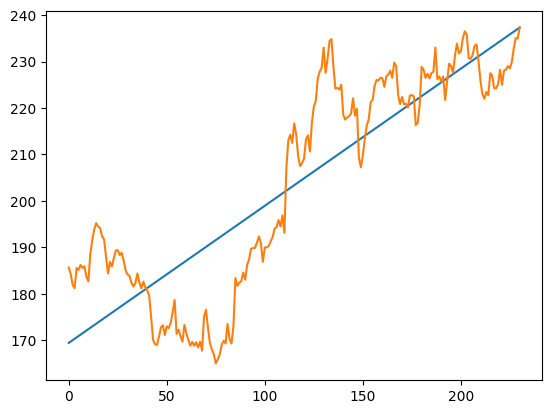

In [48]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [49]:
adf_test(prices_detrended)

ADF Statistic: -2.113887856590995
p-value: 0.23896701776526852
critical value (1%): -3.459
critical value (5%): -2.874
critical value (10%): -2.574


In [50]:
0.23896701776526852 < 0.05

False

## Moving Average

In [51]:
import numpy as np
import pandas as pd
# using a moving average to remove trend

# Convert prices to a Pandas Series
prices_series = pd.Series(prices)

# window=12 might indicate a 12-month (1-year) moving average.
window = 12 # Defines the number of time steps
prices_ma = prices_series.rolling(window=window).mean()
prices_detrended = prices_series - prices_ma
prices_detrended = prices_detrended.dropna()

In [52]:
adf_test(prices_detrended)

ADF Statistic: -4.36115071825453
p-value: 0.00034752032906515206
critical value (1%): -3.461
critical value (5%): -2.875
critical value (10%): -2.574


In [53]:
0.00034752032906515206 < 0.05 


True

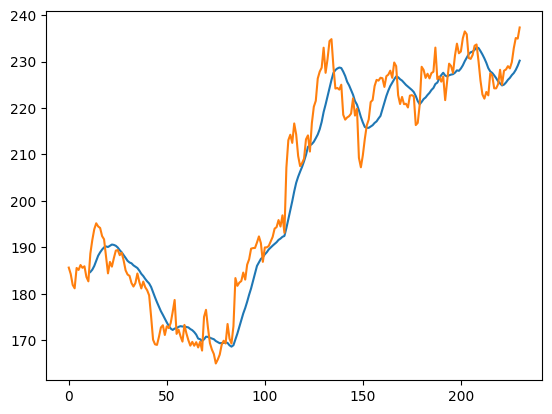

In [54]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

## Seasonal decomposition

. Seasonal adjustment removes seasonality by isolating the seasonal component and subtracting it from the original time series.

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert prices to a Pandas Series (with a datetime index if possible)
prices_series = pd.Series(prices)

# seasonal decomposition using moving averages
decomposition = seasonal_decompose(prices_series, model='additive', period=30)
prices_adjusted = prices_series/ decomposition.seasonal # to remove seasonaity.
prices_adjusted = prices_adjusted.dropna()

In [56]:
adf_test(prices_adjusted)

ADF Statistic: -3.624460436401383
p-value: 0.005310251875397082
critical value (1%): -3.461
critical value (5%): -2.875
critical value (10%): -2.574


In [57]:
0.005310251875397082 < 0.05

True

. Start with differencing if trends are present.
. Use transformations to stabilize variance.
. Apply de-trending for linear or non-linear trends.
. Adjust for seasonality if periodic patterns exist.

## White Noise and Random Walk

5. White Noise and Random Walk
• White noise: Characteristics
. Random Walk: Characteristics
. Identifying white noise and random walk

> white noice: no pattern, trend, and seasonality
  . constant mean, variance and no auto correlation.
  . then this data is completely random.then this data is not predictable.becoz data is random. the example is flip the coin in completely ramdon and independent.
  . Zero Autocorrelation: No correlation between the values at different time points; past values have no influence on future values.
> . White noise data is not useful in time series analysis because it lacks any discernible patterns, trends, or dependencies over time, which are crucial for making predictions or gaining insights. White noise is characterized by a constant mean, constant variance, and no autocorrelation (i.e., past values do not influence future values). This randomness makes it impossible to extract meaningful relationships or build models that can forecast future values.
> Random walk: 
  . A random walk is a time series where each value depends on its immediate previous value plus a random change (white noise). It has no fixed mean, no fixed variance, and exhibits long-term unpredictable behavior.
  . random walk data is non stationary. we need it to be predictable. first make stationary then predict.
> identify the white noise and random walk:
  . visualy: A white noise series appears as a completely random scatter around a constant mean, with no visible pattern.
    Example: Use a time series plot to check if data points fluctuate around a constant mean.
  . Autocorrelation Function (ACF): For white noise, the autocorrelations at all lags are close to zero (no dependency between time  steps). Use tools like the ACF plot from statsmodels to confirm.  
  . Ljung-Box Test: Checks whether the series has significant autocorrelation. A high p-value suggests white noise.

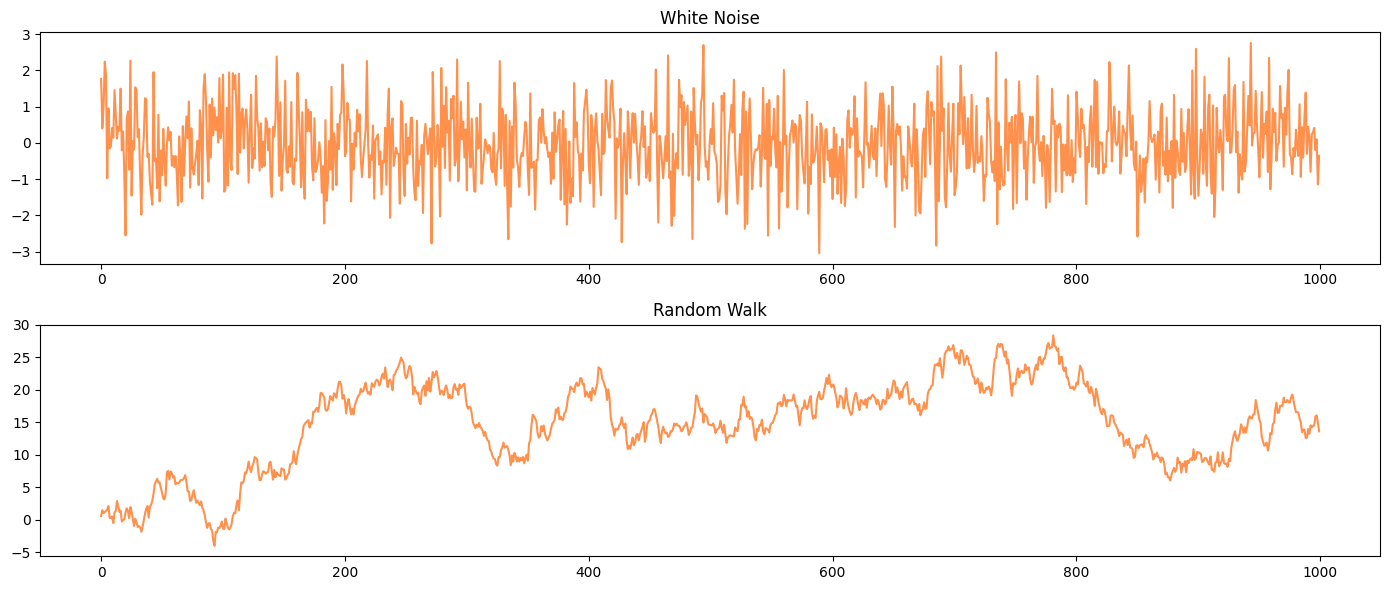


Ljung-box test for white noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-box testfor random walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [58]:
# check white noice and random walk
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox # check for autocorrelation in both series.

# generating white noise and random walk for comparison
np.random.seed(0)
n= 1000

# white noice
white_noice = np.random.normal(0,1,n)
# [ 1.764,  0.400,  0.978,  2.240,  1.867, -0.977,  0.950, -0.151, -0.103,  0.410] 
# Each value is random and uncorrelated. 0

# random walk
random_shocks = np.random.normal(0,1,n)
random_walk = np.cumsum(random_shocks)

# plotting the series
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
plt.plot(white_noice, color = '#FF914D')
plt.title(f'White Noise')

plt.subplot(2,1,2)
plt.plot(random_walk, color = '#FF914D')
plt.title(f'Random Walk')

plt.tight_layout()
plt.show()

# Ljung-box test
print("\nLjung-box test for white noise:")
lb_test_white_noise = acorr_ljungbox(white_noice, lags=[10], return_df=True)
print(lb_test_white_noise)

print("\nLjung-box testfor random walk:")
lb_test_random_walk= acorr_ljungbox(random_walk, lags=[10], return_df= True)
print(lb_test_random_walk)

In [59]:
# p-value > 0.05 → Fail to reject the null hypothesis → Data is white noise (random).
# p-value < 0.05 → Reject the null hypothesis → Data has autocorrelation.

In [60]:
0.171828 > 0.05

True

In [61]:
0.171828 < 0.05 # A high p-value suggests white noise.

False

In [62]:
0.0 < 0.05

True

In [63]:
# if p value less than 0.171828 then our data is random walk. 
# ho:  there is no autocorelation
# h1: there is a autocorrelation 
# 

# TIME SERIES FORCASTING MODELS

## AR Model

> AR:  
 . if current valu pepend on past value.
 .use past value to predict future. and order of AR model denoted by p.
 . The Autoregressive (AR) model is one of the simplest and most commonly used models for time series analysis and forecasting. It assumes that the current value of a time series depends linearly on its past values (lags) and a random error term.
 > . Assumes linear relationships between current and past values.
   . Struggles with non-linear patterns or complex relationships.
   . Requires stationarity, so preprocessing may be necessary.
 . find the linear regression from the past value.
 . The AR model requires the time series to be stationary, meaning its statistical properties (mean, variance, autocorrelation) do not change over time.
 . If the series is non-stationary, it may need to be transformed (e.g., differencing) before applying the AR model.
 

In [64]:
# making data stationary before model fitting
stock_data = yf.download('AAPL', start= '2024-01-01', end= '2024-12-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

# split the data into training and testing datasets
train_data, test_data =apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [65]:
len(apple_price_stationary)

230

In [66]:
len(train_data)

200

In [67]:
len(test_data)

30

In [68]:
len(train_data) + len(test_data)-1  # 200 +30 -1 = 229

229

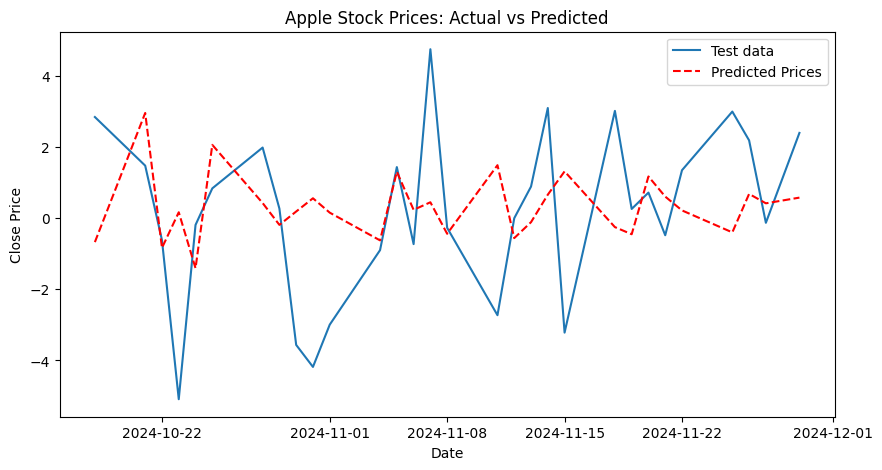

RMSE: 2.52


In [69]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# make predictions on the test data
predictions = model_fit.predict(
    start= len(train_data),
    end= len(train_data) + len(test_data)-1,
    dynamic= False)  # from index 200 to 229 

# plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluation model using RMSE score
# RMSE instead of MAPE for percentage-based errors in sales forecasting.
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

# MA model

> use the past error term(residual) and predict the future.
  . 
> The Moving Average (MA) model is a fundamental time series model that uses past forecast errors (residuals) to predict the current value. Unlike the autoregressive (AR) model, which relies on past values of the series itself, the MA model focuses on past shocks (random noise) to explain the variability.

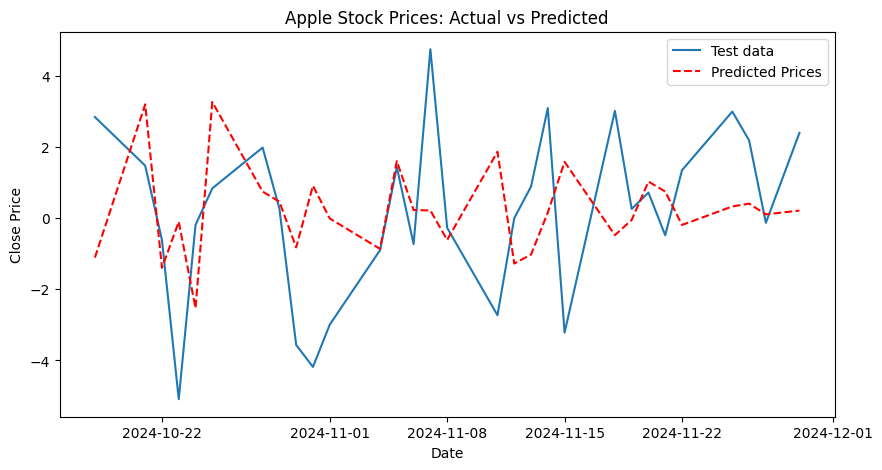

RMSE: 2.65


In [70]:
from statsmodels.tsa.arima.model import ARIMA

# fit the moving average (MA) model to the training data
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

# make predictions on the test data 
predictions= model_fit.predict(
    start= len(train_data),
    end= len(train_data) + len(test_data)-1,
    dynamic= False)

# plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluation model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

In [74]:
# If Apple's stock price is around 200 USD, RMSE = 4.14 is reasonable (~2% error).
# If the stock price has high daily fluctuations, then RMSE = 4.14 is acceptable.
# If other models have lower RMSE, then this MA model might need improvement.

# ARMA

> 
> if current value depend on past value and have high flucutation then use ARMA
> The ARMA (Auto-Regressive Moving Average) model combines the strengths of the AR (Auto-Regressive) and MA (Moving Average) models to handle both the past values of a time series and the influence of past forecast errors. It is suitable for stationary time series data.

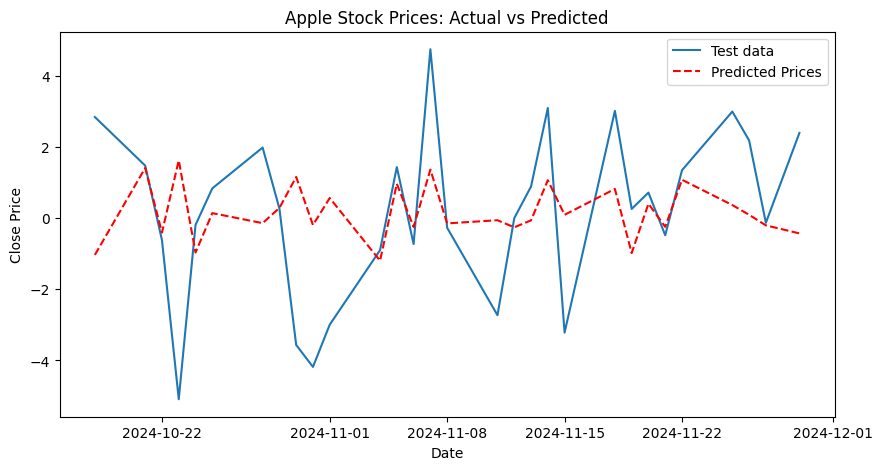

RMSE: 2.43


In [71]:
# fit the  (ARMA) model to the training data
model = ARIMA(train_data, order=(7,0,7))
model_fit = model.fit()

# make predictions on the test data 
predictions= model_fit.predict(
    start= len(train_data),
    end= len(train_data) + len(test_data)-1,
    dynamic= False)

# plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluation model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

# ARIMA MODEL

> i mean involves for differencing order
. ARIMA introduces the "Integrated" component to handle non-stationarity by differencing the data.
. This differencing removes trends and stabilizes the mean, enabling the model to work effectively. For example, if a time series shows a clear upward trend, ARIMA can first difference the data to make it stationary, then apply AR and MA components to capture dependencies and noise. This makes ARIMA a more versatile choice for real-world time series with trends or other non-stationary features.
> ARIMA (AutoRegressive Integrated Moving Average) is used instead of AR, MA, or ARMA models when the time series data is non-stationary, meaning it has trends, seasonality, or varying statistical properties over time. While AR and MA models are suitable for stationary data, and ARMA works for stationary series with both autocorrelation and random shocks, ARIMA introduces the "Integrated" component to handle non-stationarity by differencing the data. 
> ARIMA (p,d,q)

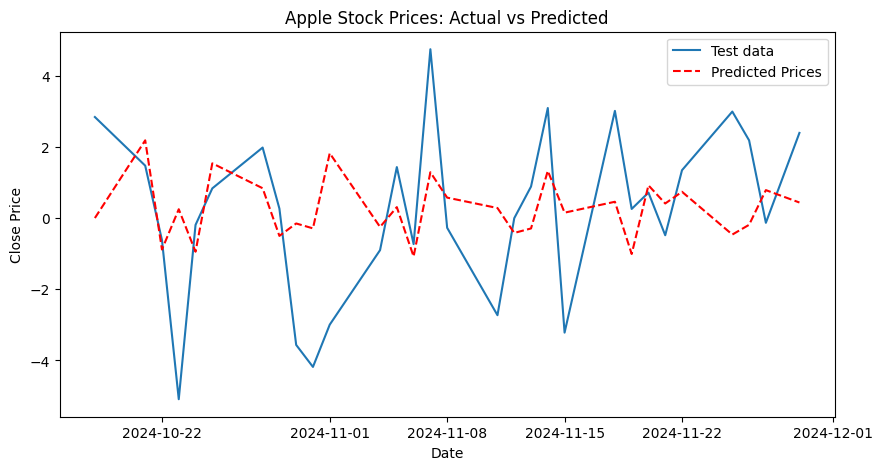

RMSE: 2.32


In [72]:
# fit the moving average (MA) model to the training data
model = ARIMA(train_data, order=(7,1,7))
model_fit = model.fit()

# make predictions on the test data 
predictions= model_fit.predict(
    start= len(train_data),
    end= len(train_data) + len(test_data)-1,
    dynamic= False)

# plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluation model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

# SARIMA

> if seasonality is also present then use sarima.
. sarima(p,d,q)(P,D,Q)m     => (p,d,q) order of arima.  ,    => (P,D,Q) order of seasonal part.  , m for period. like days, month, year.
> SARIMA (Seasonal AutoRegressive Integrated Moving Average) is used instead of AR, MA, ARMA, or ARIMA when the time series data exhibits clear seasonal patterns in addition to trends and other dependencies. While ARIMA handles non-stationarity by differencing, it does not explicitly model repeating seasonal behaviors (e.g., monthly or yearly cycles). SARIMA extends ARIMA by adding seasonal components that capture patterns repeating at regular intervals, using parameters for seasonal autoregression, differencing, and moving averages.

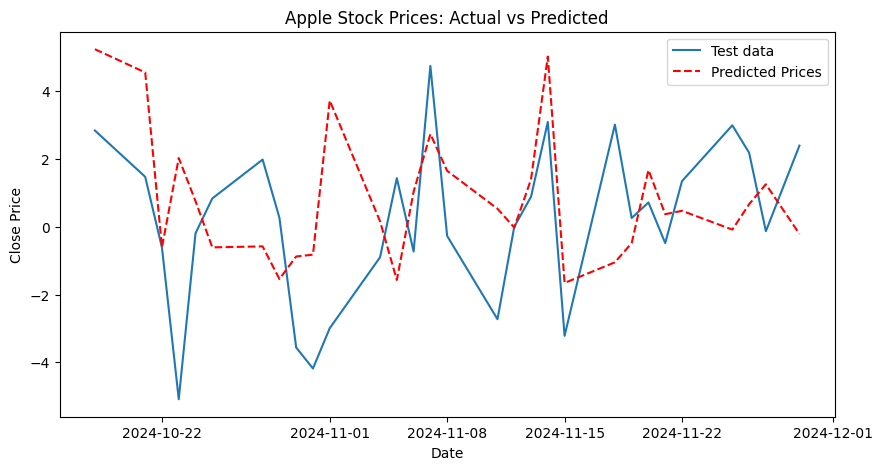

RMSE: 2.71


In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 7,1,7
P,D,Q, s = 1,1,1,45

# fit the sarima model
model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,s)) # seasonal parameters
model_fit = model.fit()

# make predictions on the test data 
predictions= model_fit.predict(
    start= len(train_data),
    end= len(train_data) + len(test_data)-1,
    dynamic= False)

# plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluation model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

### hyperparameter tunning of SARIMA Model. 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools  # generate all possible combinations of parameters.
import warnings
warnings.filterwarnings('ignore')

# Define the range of hyperparameters for Grid Search
p_values = [5, 7, 9]
d_values = [1]  # d=1 to be the best choice, there's no need to test multiple values.
q_values = [5, 7, 9]
P_values = [0, 1]
D_values = [1]
Q_values = [0, 1]
s_values = [30, 45, 60]  # Possible seasonal periods

best_rmse = float('inf')  
best_params = None

# Perform Grid Search
for p, d, q, P, D, Q, s in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
    try:
        model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
        model_fit = model.fit(disp=False)
        predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
        rmse = np.sqrt(mean_squared_error(test_data, predictions))
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q, P, D, Q, s)
            print(f'New Best RMSE: {best_rmse:.2f} with Params: {best_params}')
    except:
        continue

# Train the best model
print("\nTraining best model with parameters:", best_params)
model = SARIMAX(train_data, order=best_params[:3], seasonal_order=best_params[3:])
model_fit = model.fit()

# Make final predictions
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print final RMSE
print('Final Best RMSE:', round(best_rmse, 2)) 


New Best RMSE: 4.69 with Params: (5, 1, 5, 0, 1, 0, 30)
New Best RMSE: 3.87 with Params: (5, 1, 5, 0, 1, 0, 45)
New Best RMSE: 3.05 with Params: (5, 1, 5, 0, 1, 1, 30)
New Best RMSE: 2.86 with Params: (5, 1, 5, 0, 1, 1, 45)


: 

: 

> if dependdent on past value then use AR.
. if have fluactuation then use MA.
. if dependent on past value and have fluaction then use ARMA.
. if perform differencing then use ARIMA.
. if with all this if seasonality present then use SARIMA.

# SMOOTHING METHODS

> two methods: 1. moving average, 2. exponential smoothing
> Smoothing methods are used in time series data to remove noise and reveal underlying trends or patterns. These methods help in better forecasting, reducing fluctuations, and making the data easier to interpret.Smoothing is needed when the data is highly volatile, making it difficult to identify trends or seasonal patterns.

1. MA: The moving average computes the mean of data points over a fixed window that slides through the series. Each observation within the window has equal weight.
. Simple Moving Average (SMA): Assigns equal weights to all observations in the window.
. Weighted Moving Average (WMA): Assigns more weight to recent observations.

2. ES: Exponential smoothing gives exponentially decreasing weights to past observations, giving more importance to recent data while still considering older data.
. α => smoothing factor
. α = 2/ n+1      -> n= window size and alpha is user defined. 
. Single Exponential Smoothing: For data without trend or seasonality.
. Double Exponential Smoothing (Holt’s Method): For data with trends.
. Triple Exponential Smoothing (Holt-Winters Method): For data with trends and seasonality.

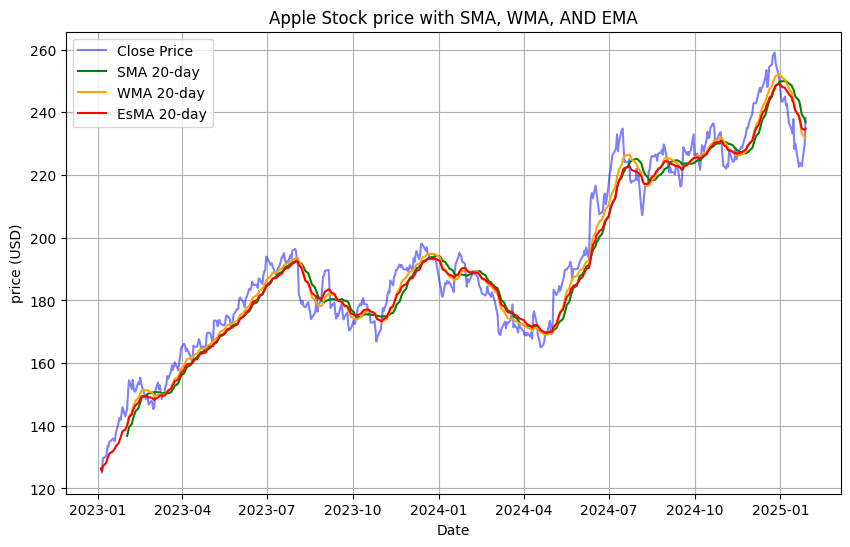

In [ ]:
# Simple moving average
window_size= 20
stock_data['SMA']= stock_data['Close'].rolling(window=window_size).mean()

# calculate weighted moving average (WMA)
weights= np.arange(1, window_size +1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights)/ weights.sum(), raw=True)

# calculate exponential moving average
stock_data['EMA'] = stock_data['Close'].ewm(span= window_size).mean()

# plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label= f'SMA {window_size}-day', color='green')
plt.plot(stock_data['WMA'], label= f'WMA {window_size}-day', color='orange')
plt.plot(stock_data['EMA'], label= f'EMA {window_size}-day', color='red')

plt.title('Apple Stock price with SMA, WMA, AND EMA')
plt.xlabel('Date')
plt.ylabel('price (USD)')
plt.legend()
plt.grid()
plt.show()

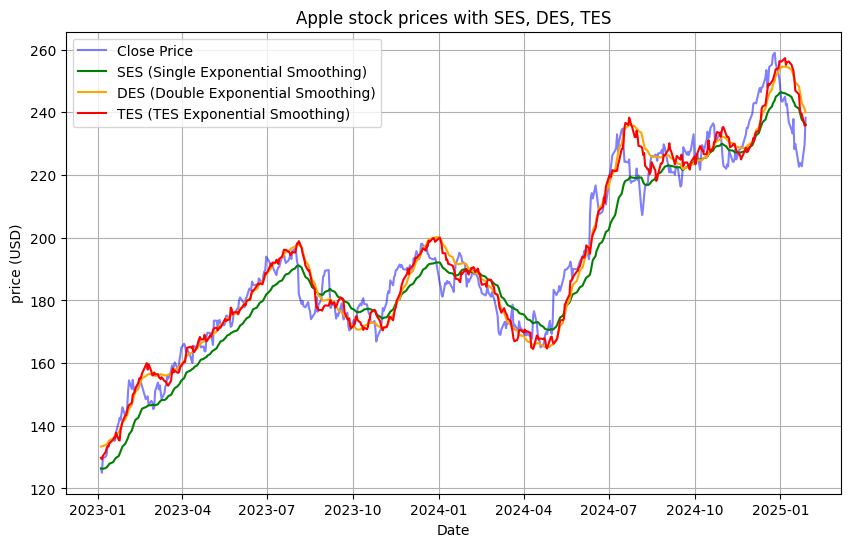

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = stock_data['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.07)
stock_data['SES'] = ses_model.fittedvalues

# double exponential smoothing (des) - holt's linear trend model
des_model = ExponentialSmoothing(close_prices, trend= 'add').fit(smoothing_level=0.07)
stock_data['DES']= des_model.fittedvalues

# triple exponential smoothing (tes) - holt- winters method
tes_model = ExponentialSmoothing(close_prices, trend= 'add', seasonal= 'add', seasonal_periods=12).fit(smoothing_level= 0.07)
stock_data['TES']= tes_model.fittedvalues

# plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label= 'Close Price', color= 'blue', alpha=0.5)
plt.plot(stock_data['SES'], label= 'SES (Single Exponential Smoothing)', color= 'green')
plt.plot(stock_data['DES'], label= 'DES (Double Exponential Smoothing)', color= 'orange')
plt.plot(stock_data['TES'], label= 'TES (TES Exponential Smoothing)', color= 'red')

plt.title('Apple stock prices with SES, DES, TES')
plt.xlabel('Date')
plt.ylabel('price (USD)')
plt.legend()
plt.grid()
plt.show()

# ACF and PACF Plot

> ACF: are used in time series analysis to understand the relationship between past and present values. ACF measures how strongly current values are correlated with past values (lags) by considering both direct and indirect effects.measures the direct correlation between a value and its lagged values, removing the influence of intermediate lags.
> PACF: 
 . consider the intermediate lags. 
> ACF and PACF are powerful tools for identifying the structure of time series data and selecting appropriate models. By understanding how they guide the choice of AR, MA, and ARIMA parameters, analysts can create efficient, interpretable models tailored to the data's characteristics. Using these tools ensures better forecasts and enhances understanding of underlying time series patterns. 
> autocorelation: correlation by itself.     X  <------> laged version of X
> If spikes (bars) are under the blue area, it means that the autocorrelations at those lags are statistically insignificant.
. confidence interval: boundry of blue area.
. if all spikes in under confidence interval mean that there is no spike that is statistically significant.

> on stationary data ACF decay exponentially and sinusoidly. 
  --------------------------------------------------------------
  MODEL                   ACF                         PACF
  --------------------------------------------------------------
   AR              Tails off/decay           cuts of after lag p
   MA             cuts of after lag q          Tails off/decay 
  ARMA             Tails off/decay             Tails off/decay   


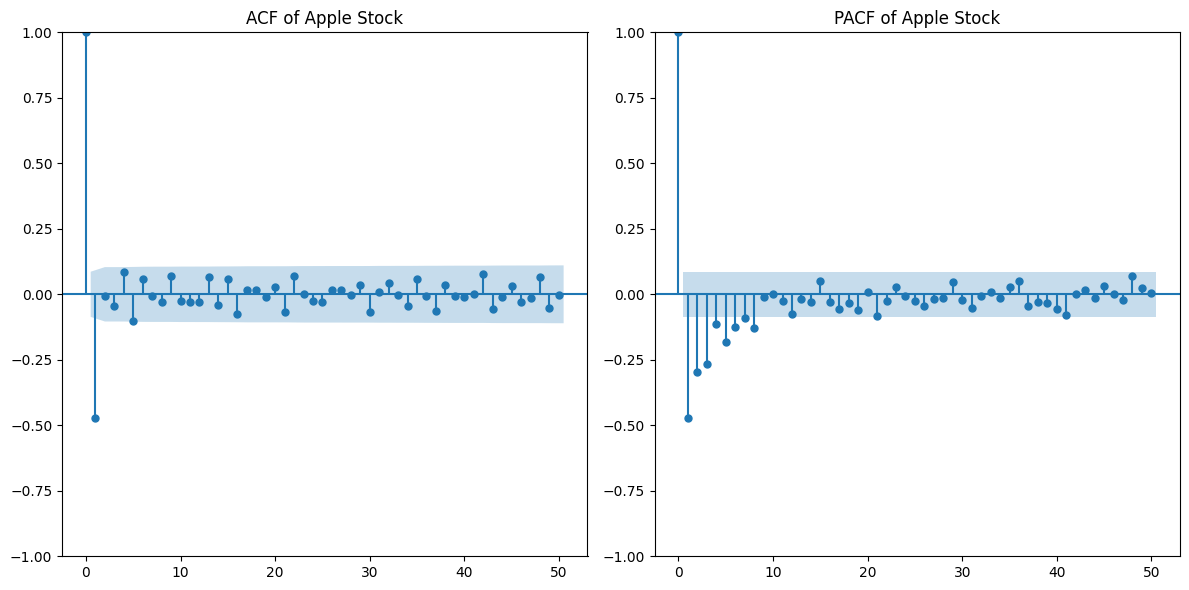

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,6))

# ACF plot
plt.subplot(1,2,1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Apple Stock')

# PACF plot
plt.subplot(1,2,2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()
# Spikes within the blue area → No significant autocorrelation at those lags (random fluctuations).
# Spikes above or below the blue area → Significant autocorrelation at those lags (indicating a pattern or trend in the data).

# Model evaluation metrics

1. Mean Absolute Error (MAE):
. Measures the average magnitude of errors between predictions and actual values, without considering direction.
. traeat all error equally and less sensitive to outlier.
2. Mean Squared Error (MSE):
. Measures the average of squared differences between predictions and actual values, penalizing larger errors more heavily.
. sensitive to outlier and useful for detecting large error.
3  Root Mean Squared Error (RMSE):
. The square root of MSE, providing an error measure in the same units as the original data.
. 

In [ ]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

#fit the autoregressive model (AR) to the training data
model= AutoReg(train_data, lags=30)
model_fit= model.fit()

# make predictions on the test data
predictions = model_fit.predict(
    start= len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic= False)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 1. mean absolute error (mae)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}' )

# 2. mean squared error (mse)
mse = mean_absolute_error(test_data, predictions)
print(f'Mean squared Error (MAE): {mse}' )

# 3. root mean squared error (rmse)
rmse = np.sqrt(mse)
print(f'root mean squared error (rmse): {rmse}')

# 4. mean absollute percentage error (mape)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data)))*100
print(f'mean absolute percentage error (mape): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic

print(f'akaike information criterion (aic): {aic}')
print(f'bayesian information criterion (bic): {bic}')

Mean Absolute Error (MAE): 2.864530271855958
Mean squared Error (MAE): 2.864530271855958
root mean squared error (rmse): 1.6924923254939617


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None